In [1]:
# ------------------------------------------------------------------------
#
# TITLE - transient_spiral_phi0.ipynb
# AUTHOR - James Lane
# PROJECT - AST1501
# CONTENTS:
#
# ------------------------------------------------------------------------
#
# Docstrings and metadata:
'''Investigate the correct angle for spiral arms at the present day
'''

__author__ = "James Lane"

In [2]:
### Imports

## Basic
import numpy as np
import pdb, sys, importlib, copy, importlib
from tqdm import tqdm_notebook

## Plotting
import matplotlib
from matplotlib import pyplot as plt
# from matplotlib.backends.backend_pdf import PdfPages
# from matplotlib import colors
# from matplotlib import cm

## Astropy
from astropy import units as apu
# from astropy.io import fits
# from astropy.coordinates import SkyCoord
# from astropy import table

## galpy
from galpy import orbit
from galpy import potential
from galpy import actionAngle as aA
from galpy import df
from galpy.util import bovy_coords as gpcoords
from galpy.util import bovy_conversion as gpconv
from galpy.util import bovy_plot as gpplot

## Project-specific
sys.path.insert(0,'../../src/')
import ast1501.potential

In [3]:
# Matplotlib for notebooks
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [4]:
pot = potential.SpiralArmsPotential(N=2, r_ref=8*apu.kpc, Rs=2.4*apu.kpc, H=0.125*apu.kpc, 
                                    Cs=[1,], alpha=12*apu.deg, phi_ref=90*apu.deg)

In [5]:
potential.evaluateDensities(pot, 8*apu.kpc, 0*apu.kpc, phi=0*apu.rad)

-0.07840881225906889

In [6]:
rs = np.arange(6,12,0.05)
zs = np.zeros_like(rs)
phis = np.zeros_like(rs)
phi0 = np.arange(0,90,2.5)

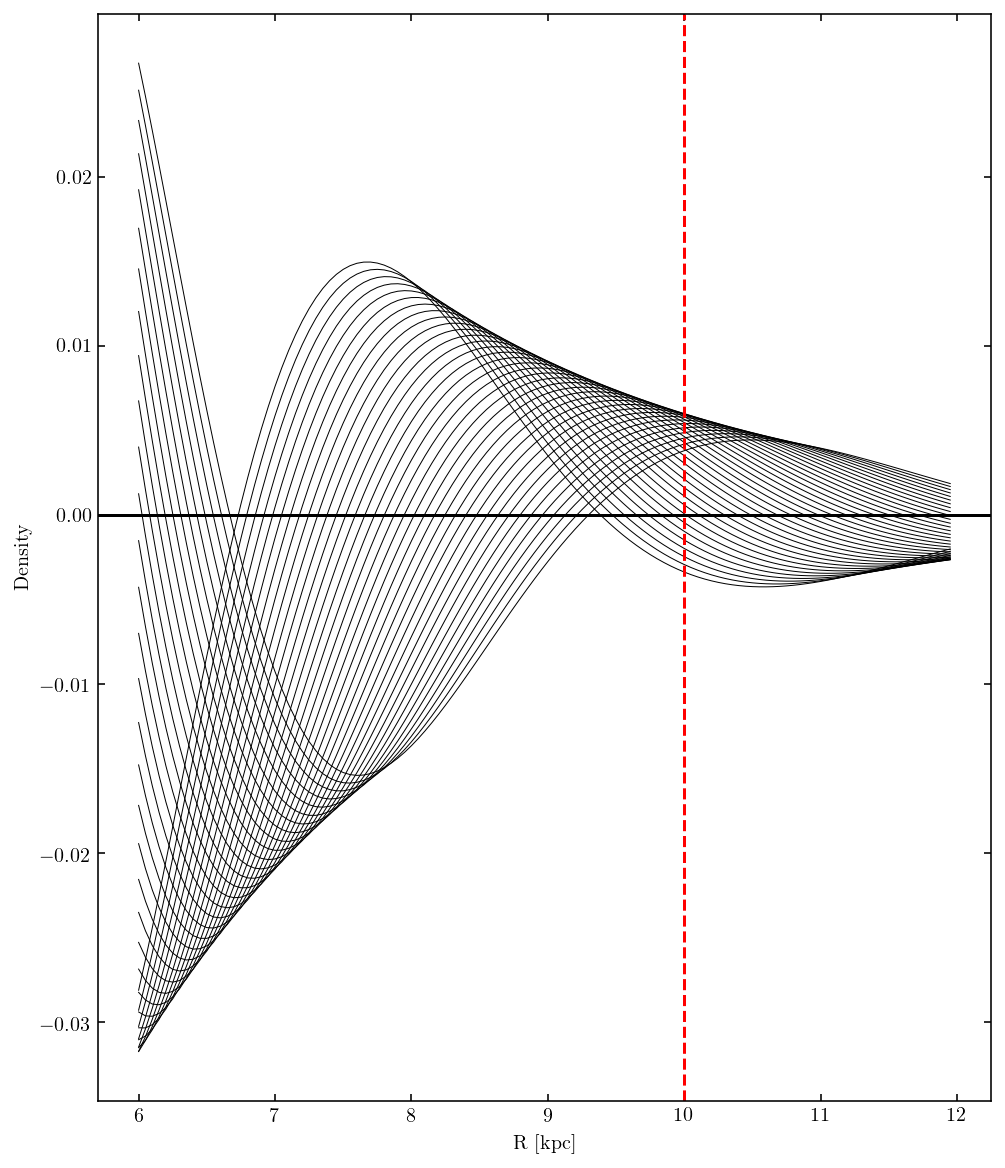

In [7]:
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(111)

for i in range( len(phi0) ):
    
    pot = potential.SpiralArmsPotential(N=2, r_ref=8*apu.kpc, Rs=2.4*apu.kpc, H=0.125*apu.kpc, 
                                    Cs=[1,], alpha=12*apu.deg, phi_ref=phi0[i]*apu.deg)
    potential.turn_physical_on(pot)
    
    dens = potential.evaluateDensities(pot, rs*apu.kpc, zs*apu.kpc, phi=phis*apu.rad)
    ax.plot(rs, dens.value, c='Black', linewidth=0.5)
    
    #dens_deriv = np.diff(dens)
    #ax.plot(rs[:-1]+np.diff(rs)[0], dens_deriv.value, c='Black', linewidth=0.5)
###i

ax.set_xlabel('R [kpc]')
ax.set_ylabel('Density')
ax.axvline(10, c='Red', linestyle='dashed')
ax.axhline(0, c='Black', linestyle='solid')
fig.set_facecolor('White')
plt.show()

# Manually go through and determine where there is a spiral arm sitting 2 kpc outside of the solar radius

## 2 arm spiral

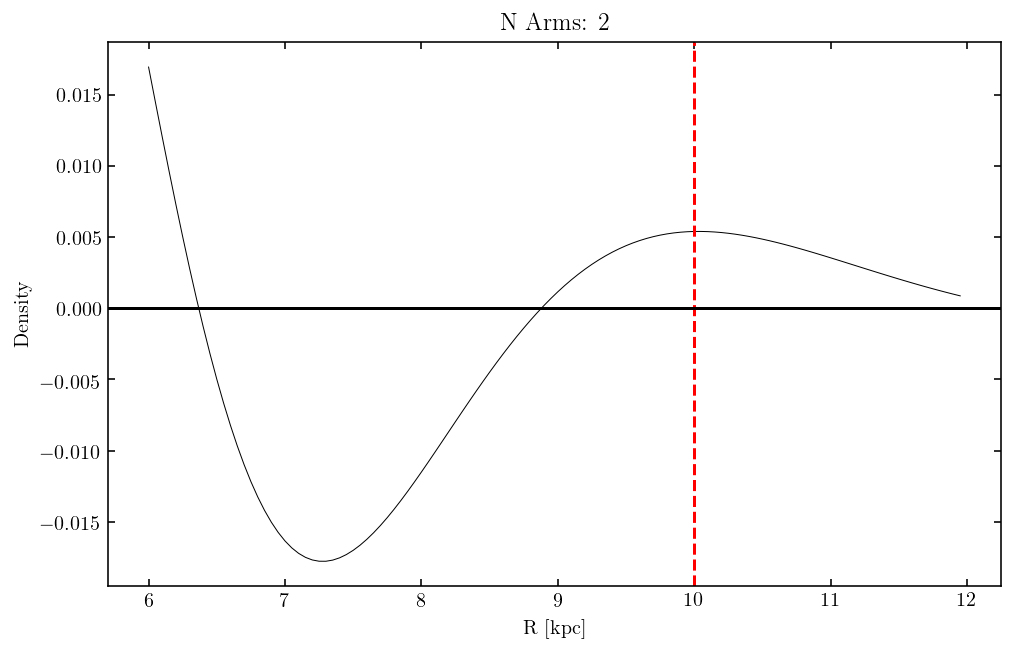

In [23]:
rs = np.arange(6,12,0.05)
zs = np.zeros_like(rs)
phis = np.zeros_like(rs)
phi0 = 75
N_arms = 2

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
#ax2 = fig.add_subplot(122)

pot = potential.SpiralArmsPotential(N=N_arms, r_ref=8*apu.kpc, Rs=2.4*apu.kpc, H=0.125*apu.kpc, 
                                    Cs=[1,], alpha=12*apu.deg, phi_ref=phi0*apu.deg)
potential.turn_physical_on(pot)

dens = potential.evaluateDensities(pot, rs*apu.kpc, zs*apu.kpc, phi=phis*apu.rad)
ax.plot(rs, dens.value, c='Black', linewidth=0.5)

#dens_deriv = np.diff(dens)
#ax2.plot(rs[:-1]+np.diff(rs)[0], dens_deriv.value, c='Black', linewidth=0.5)

ax.set_xlabel('R [kpc]')
ax.set_ylabel('Density')
ax.axvline(10, c='Red', linestyle='dashed')
ax.axhline(0, c='Black', linestyle='solid')
ax.set_title('N Arms: '+str(N_arms))
#ax2.set_xlabel('R [kpc]')
#ax2.set_ylabel('Density Differential')
#ax2.axvline(10, c='Red', linestyle='dashed')
#ax2.axhline(0, c='Black', linestyle='solid')

fig.set_facecolor('White')
plt.show()

/Users/JamesLane/Software/Python/miniconda3/lib/python3.7/site-packages/galpy/util/bovy_plot.py:646: UserWarning: No contour levels were found within the data range.
  linestyles=cntrls,origin=origin)



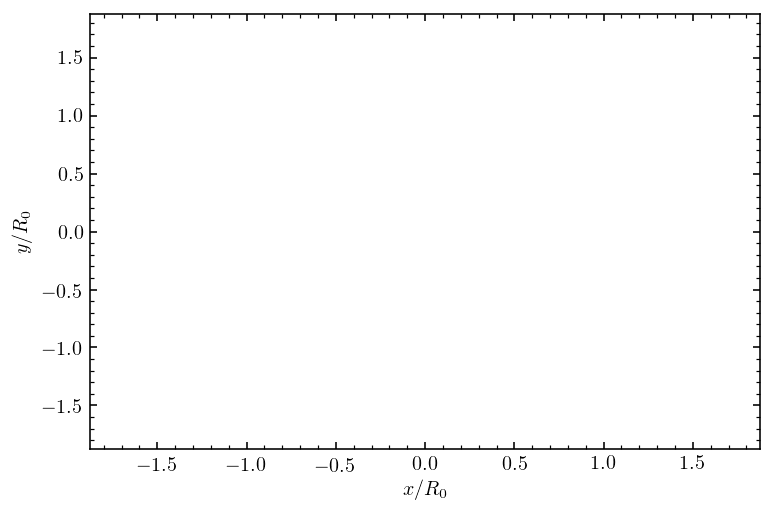

In [27]:
# potential.plotPotentials(pot, xy=True, rmin=-15*apu.kpc, rmax=15*apu.kpc, zmin=-15*apu.kpc, 
#                         zmax=15*apu.kpc, nrs=60, nzs=60, justcontours=True, 
#                         levels=np.array([0.1,2.5,5,7.5,10.]) ) 
# fig = plt.gcf()
# fig.set_facecolor('White')

## 3 arm spiral

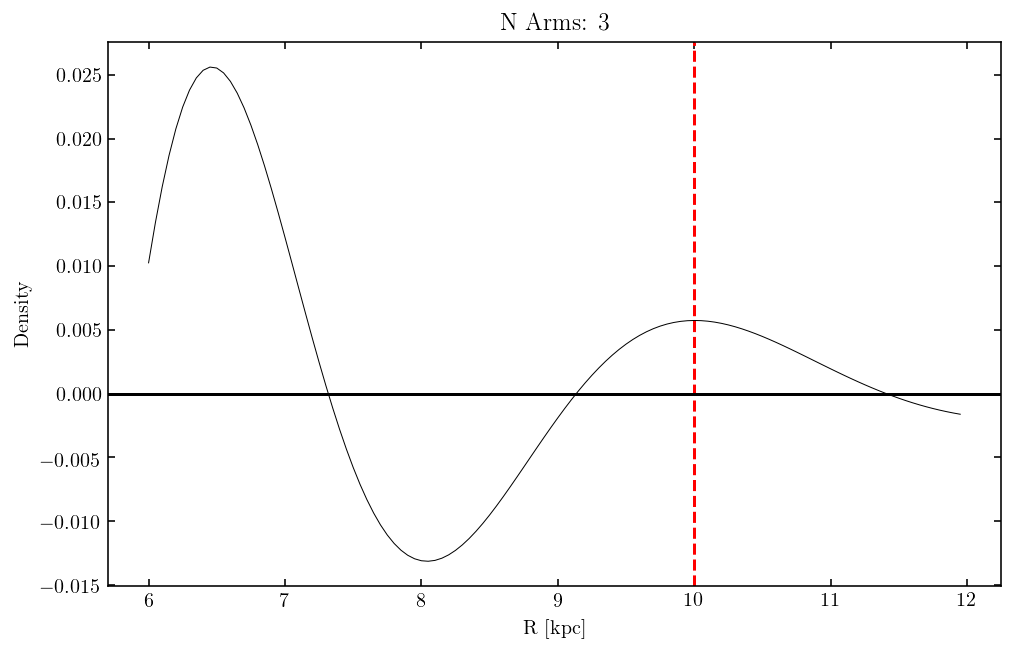

In [61]:
rs = np.arange(6,12,0.05)
zs = np.zeros_like(rs)
phis = np.zeros_like(rs)
phi0 = 67
N_arms = 3

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

pot = potential.SpiralArmsPotential(N=N_arms, r_ref=8*apu.kpc, Rs=2.4*apu.kpc, H=0.125*apu.kpc, 
                                    Cs=[1,], alpha=12*apu.deg, phi_ref=phi0*apu.deg)
potential.turn_physical_on(pot)

dens = potential.evaluateDensities(pot, rs*apu.kpc, zs*apu.kpc, phi=phis*apu.rad)
ax.plot(rs, dens.value, c='Black', linewidth=0.5)

ax.set_xlabel('R [kpc]')
ax.set_ylabel('Density')
ax.axvline(10, c='Red', linestyle='dashed')
ax.axhline(0, c='Black', linestyle='solid')
ax.set_title('N Arms: '+str(N_arms))

fig.set_facecolor('White')
plt.show()

## 4 arm spiral

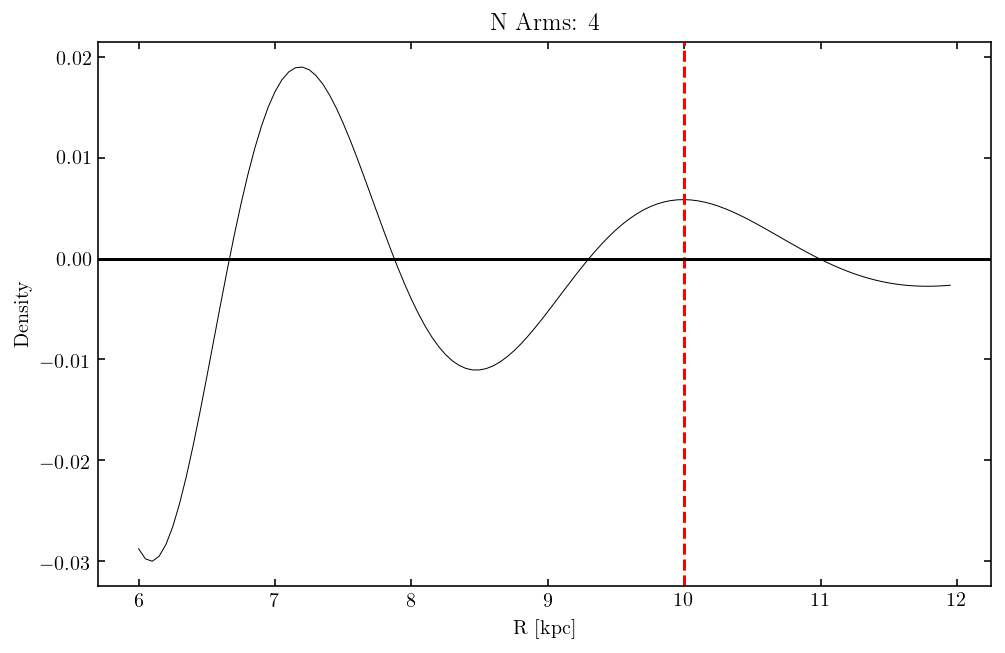

In [67]:
rs = np.arange(6,12,0.05)
zs = np.zeros_like(rs)
phis = np.zeros_like(rs)
phi0 = 64
N_arms = 4

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)

pot = potential.SpiralArmsPotential(N=N_arms, r_ref=8*apu.kpc, Rs=2.4*apu.kpc, H=0.125*apu.kpc, 
                                    Cs=[1,], alpha=12*apu.deg, phi_ref=phi0*apu.deg)
potential.turn_physical_on(pot)

dens = potential.evaluateDensities(pot, rs*apu.kpc, zs*apu.kpc, phi=phis*apu.rad)
ax.plot(rs, dens.value, c='Black', linewidth=0.5)

ax.set_xlabel('R [kpc]')
ax.set_ylabel('Density')
ax.axvline(10, c='Red', linestyle='dashed')
ax.axhline(0, c='Black', linestyle='solid')
ax.set_title('N Arms: '+str(N_arms))

fig.set_facecolor('White')
plt.show()